In [1]:
import numpy as np

target_files = [
  "train.feature.txt",
  "valid.feature.txt",
  "test.feature.txt",
]

Cs = np.logspace(-3, 3, num=7)
scores = []

print(Cs)

[1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]


In [2]:
import pandas as pd

train_df = pd.read_csv("./train.feature.txt")
train_x = train_df.iloc[:,2:]
train_y = train_df.iloc[:,0]

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from tqdm import tqdm

for file in target_files:
  scores_file = []

  for c in tqdm(Cs):
    lr = LogisticRegression(C=c, max_iter=1000)
    lr.fit(train_x, train_y)

    df = pd.read_csv(file)
    data = df.iloc[:,2:]
    y_true = df.iloc[:,0]

    y_pred = lr.predict(data)
    score = accuracy_score(y_true, y_pred)
    scores_file.append(score)
  
  scores.append(scores_file)

100%|██████████| 7/7 [00:22<00:00,  3.26s/it]


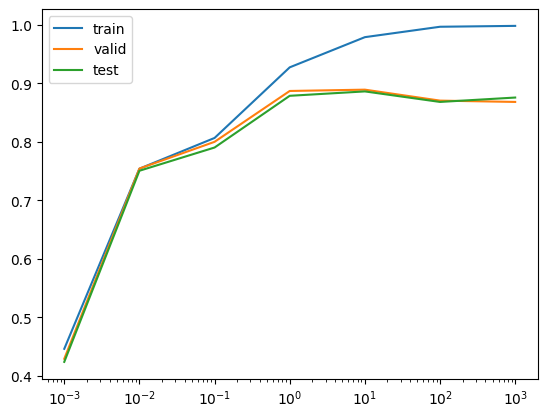

In [4]:
import matplotlib.pyplot as plt

for i, target in enumerate(scores):
  plt.plot(Cs, target, label=target_files[i].replace(".feature.txt", ""))

plt.legend()
plt.xscale('log')
plt.show()